# Explore here

En este proyecto se intentará predecir la calidad de un vino tinto según las características químicas.

#### Paso 1. Lectura del conjunto de datos procesado

Pasaremos a leer el conjunto de datos y visualizar la tabla para ver con qué columnas trabajaremos.

In [1]:
# Your code here
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")

total_data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


A continuación observamos que trabajaremos con 1599 filas y 12 columnas.

In [2]:
total_data.shape

(1599, 12)

Obtenemos la información del tipo de datos así como filas no nulas de cada columna y observamos pues que todas son numéricas y no hay ningún valor nulo en todo el dataset.

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 2. Limpieza y tratamiento de nulos

Procedemos a elimimnar filas enteras que hayan podido estar duplicadas en el dataset. 

In [4]:
total_data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.00,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.07,13.0,40.0,1.00,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.62,0.08,1.9,0.07,28.0,38.0,1.00,3.42,0.82,9.5,6
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6
1597,5.9,0.65,0.12,2.0,0.07,32.0,44.0,1.00,3.57,0.71,10.2,5


Así pues observamos que no había filas duplicadas ya que después de limpiar los duplicados el tamaño del dataset sigue siendo el mismo.

In [5]:
total_data.shape

(1599, 12)

Pasamos a observar las características estadísticas básicas del dataset para observar los datos desde una perspectica numérica, ya que posteriormente proceremos a normalizar y estandarizar los datos.

In [6]:
total_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


Si bien habíamos visto que no había nulos, volvemos a revisar por columna y confirmamos dicho statement previo.

In [7]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

## 3. Feature engineering

En el siguiente caso procedemos a crear una nueva columna, label, que será nuestra target, ya que si bien se alimenta de la columna "quality" ya existente como queremos que los valores sean de entre 0 a 2 según calidad del vino aplicaremos una función para que nos devuelva los valores que queremos.

In [8]:
def quality_to_label(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

total_data["label"] = total_data["quality"].apply(quality_to_label)

print(total_data[["quality", "label"]].head(10))
print(total_data["label"].value_counts())

   quality  label
0        5      1
1        5      1
2        5      1
3        6      1
4        5      1
5        5      1
6        5      1
7        7      2
8        7      2
9        5      1
label
1    1319
2     217
0      63
Name: count, dtype: int64


Procedemos a separar el conjunto de datos en X, predictoras, y Y, label, la columna target. Así como la creación de los conjuntos que entrenamiento y test que utilizaremos posteriormente.

In [9]:
num_variables = [
  "fixed acidity",  
  "volatile acidity", 
  "citric acid", 
  "residual sugar", 
  "chlorides",  
  "free sulfur dioxide", 
  "total sulfur dioxide", 
  "density",
  "pH",
  "sulphates",
  "alcohol",
  ]


X = total_data.drop("label", axis = 1)[num_variables]
y = total_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
605,8.3,0.60,0.13,2.6,0.09,6.0,24.0,1.00,3.31,0.59,9.2
392,9.5,0.37,0.52,2.0,0.08,6.0,26.0,1.00,3.18,0.51,9.5
849,6.4,0.63,0.21,1.6,0.08,12.0,32.0,1.00,3.58,0.66,9.8
1418,7.8,0.53,0.01,1.6,0.08,3.0,19.0,0.99,3.16,0.46,9.8
459,11.6,0.58,0.66,2.2,0.07,10.0,47.0,1.00,3.25,0.57,9.0
...,...,...,...,...,...,...,...,...,...,...,...
924,8.6,0.47,0.27,2.3,0.06,14.0,28.0,1.00,3.18,0.80,11.2
1247,7.4,0.55,0.19,1.8,0.08,15.0,34.0,1.00,3.49,0.68,10.5
271,11.5,0.18,0.51,4.0,0.10,4.0,23.0,1.00,3.28,0.97,10.1
474,10.5,0.28,0.51,1.7,0.08,10.0,24.0,1.00,3.20,0.89,9.4


3.1 NORMALIZACIÓN

Como hemos comentado previamente, KNN precisa de normalización y/o estandarización de los datos ya que necesitamos datos en una misma escala para evitar errores del modelo para que todas las características contribuyan equitativamente a la distancia.

In [10]:
import pickle
from sklearn.preprocessing import StandardScaler


normalizador = StandardScaler()
normalizador.fit(X_train)
X_train_norm = normalizador.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = normalizador.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)


X_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
605,8.23e-03,3.98e-01,-0.71,0.04,-0.03,-0.93,-0.69,0.91,-5.38e-03,-0.40,-1.13
392,7.06e-01,-8.91e-01,1.30,-0.37,-0.10,-0.93,-0.63,0.69,-8.49e-01,-0.87,-0.85
849,-1.10e+00,5.66e-01,-0.30,-0.65,-0.14,-0.36,-0.44,0.09,1.75e+00,0.02,-0.57
1418,-2.82e-01,5.58e-03,-1.33,-0.65,-0.21,-1.21,-0.84,-0.92,-9.79e-01,-1.17,-0.57
459,1.93e+00,2.86e-01,2.03,-0.23,-0.27,-0.55,0.02,2.19,-3.95e-01,-0.51,-1.32


3.2 ESCALADO MIN-MAX

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
605,0.34,0.33,0.13,0.12,0.09,0.07,0.07,0.61,0.45,0.16,0.14
392,0.45,0.17,0.52,0.08,0.08,0.07,0.07,0.58,0.35,0.11,0.20
849,0.16,0.35,0.21,0.05,0.08,0.15,0.10,0.50,0.66,0.20,0.25
1418,0.29,0.28,0.01,0.05,0.07,0.03,0.05,0.36,0.33,0.08,0.25
459,0.64,0.32,0.66,0.09,0.07,0.13,0.15,0.79,0.40,0.14,0.11


Procedemos a guardar en Excel nuestras variables y en pickle nuestras dos funciones.

In [12]:
X_train.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_train.xlsx", index = False)
X_train_norm.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_train__norm.xlsx", index = False)
X_train_scal.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_train_scal.xlsx", index = False)
X_test.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_test.xlsx", index = False)
X_test_norm.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_test_norm.xlsx", index = False)
X_test_scal.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_test_scal.xlsx", index = False)

y_train.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/y_test.xlsx", index = False)

with open("/workspaces/ginappedrosa-ML-knn-wine_quality/models/normalizador.pkl", "wb") as file:
  pickle.dump(normalizador, file)

with open("/workspaces/ginappedrosa-ML-knn-wine_quality/models/scaler.pkl", "wb") as file:
  pickle.dump(scaler, file)


### 4. Inicialización y entrenamiento del modelo

Procedemos a observar el accuracy en entrenamiento de todas las variables de entrenamiento creadas anteriormente, con un n_neighbors de 30.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train,
    X_train_norm,
    X_train_scal,
]:
    model = KNeighborsClassifier(
        n_neighbors=30, 
        metric='euclidean', 
        weights='distance',
)
    model.fit(dataset, y_train)
    y_pred = model.predict(X_test)
    accuracy_results.append(accuracy_score(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.85, 0.834375, 0.821875]
Mejor Accuracy: 0.85


Observamos pues, que el mejor accuracy, de 0.85 en este caso, nos lo da la variable X_train (sin escalar ni normalizar.)

In [14]:
model = KNeighborsClassifier(
        n_neighbors=30, 
        metric='euclidean', 
        weights='distance',
)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)

Accuracy en test: 0.85


Procedemos a aplicar con X_train y X_test el accuracy en test, y coincide de nuevo el resultado de 0.85.

Generamos una matriz de confusión y on reporte de clasificación para ver si tienen sentido los datos expuestos anteriormente y observamos como, pese a decir que da un 85% de accuracy, el modelo falla claramente en las respuestas de 0 y 2, si bien es muy preciso para el 1.

Confusion matrix:
 [[  0   8   0]
 [  0 263   3]
 [  0  37   9]]


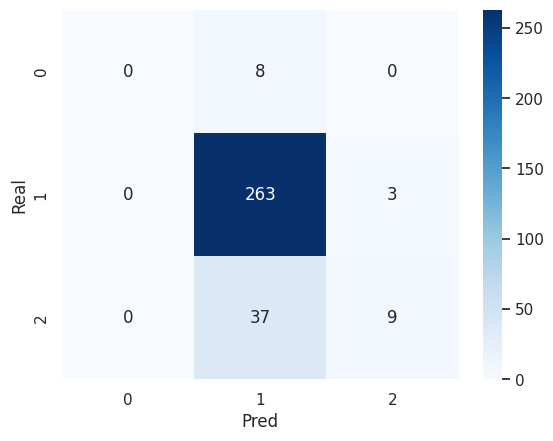

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0,1,2],
            yticklabels=[0,1,2])
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [16]:
cr = classification_report(y_test, y_pred_test)
print("Classificaion report:\n", cr)

Classificaion report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.85      0.99      0.92       266
           2       0.75      0.20      0.31        46

    accuracy                           0.85       320
   macro avg       0.53      0.39      0.41       320
weighted avg       0.82      0.85      0.81       320



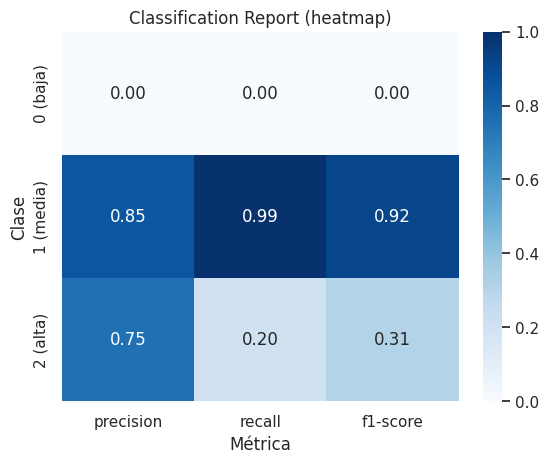

In [17]:
rep = classification_report(
    y_test, y_pred_test,
    output_dict=True,
    target_names=["0 (baja)", "1 (media)", "2 (alta)"]
)
total_data = pd.DataFrame(rep).T

heat = total_data.loc[["0 (baja)", "1 (media)", "2 (alta)"], ["precision", "recall", "f1-score"]]

sns.heatmap(heat, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="Blues")
plt.title("Classification Report (heatmap)")
plt.ylabel("Clase"); plt.xlabel("Métrica")
plt.show()


A continuación, para optimizar el modelo usamos la fórmula para obtener automáticamente qué n_neighbors sería mejor en nuestro modelo, que en este caso sería 20.

In [22]:
k_results = {}

for k in range(1,21):
    model= KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    k_results[k] = accuracy_score(y_test, y_pred)

print("K in X_test:", k_results)
print("Best K in X_test:", max(k_results))



K in X_test: {1: 0.78125, 2: 0.753125, 3: 0.778125, 4: 0.809375, 5: 0.8, 6: 0.7875, 7: 0.79375, 8: 0.8, 9: 0.821875, 10: 0.815625, 11: 0.81875, 12: 0.83125, 13: 0.828125, 14: 0.825, 15: 0.83125, 16: 0.840625, 17: 0.840625, 18: 0.840625, 19: 0.83125, 20: 0.825}
Best K in X_test: 20


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train,
    X_train_norm,
    X_train_scal,
]:
    model = KNeighborsClassifier(
        n_neighbors=20, 
        metric='euclidean', 
        weights='distance',
)
    model.fit(dataset, y_train)
    y_pred = model.predict(X_test)
    accuracy_results.append(accuracy_score(y_test, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.85625, 0.834375, 0.828125]
Mejor Accuracy: 0.85625


Reharemos el modelo pues con n_neighbors = 20 a ver si cambia el resultado y, efectivamente, se optimiza.

In [20]:
model = KNeighborsClassifier(
        n_neighbors=20, 
        metric='euclidean', 
        weights='distance',
)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)

Accuracy en test: 0.85625


Finalmente, usando el best k, de 0,85 pasando al Best K de 20 ha subido a 0.86525.

Procedemos pues a guardar el modelo.

In [21]:
from pickle import dump

dump(model, open("knn_classifier_bestk20.sav", "wb"))